In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
df_ice = pd.read_csv("./icesheets.csv")

In [2]:
val1979 = df_ice[(df_ice["Year"]==1979)]["IceArea"].values[0]
print ("Value at year 1979 = ", val1979)
df_ice["change"] = df_ice["IceArea"] - val1979
df_ice.to_csv("./icesheets.csv")

Value at year 1979 =  6455322.562999999


In [3]:
df_temp = pd.read_csv('./Temperature.csv')
df_output = pd.DataFrame(columns=["Year","Temperature"])
for year in range(1979,2013):
        tmp = df_temp[(df_temp.year==int(year))].Avg_temp.mean()
        df_output = df_output.append({'Year':str(year),'Temperature':tmp},ignore_index=True)  
df_output.to_csv('./GlobalTempCleaned.csv')        

In [4]:
df_temp = pd.read_csv('./GlobalTemp.csv')
val1979 = df_temp[(df_temp["Year"]==1979)]["Temperature"].values[0]
print ("Value at year 1979 = ", val1979)
df_temp["change"] = df_temp["Temperature"] - val1979

df_temp.to_csv("./GlobalTemp.csv")

df_temp['change'].corr(df_ice['change'])

Value at year 1979 =  18.6759500376


-0.7926009207485141

In [5]:
df_temp = pd.read_csv('./GlobalTemp.csv')
yearList = []
Average_Temperature = []
for year in range(1979,2013):
    yearList.append(year)   
Average_Temperature = df_temp["change"].tolist()    


In [6]:
df_ice = pd.read_csv("./icesheets.csv")
Ice_Area = []
Ice_Area = df_ice["change"].tolist()

In [7]:
x = np.array(Average_Temperature).reshape(-1, 1)
y = np.array(Ice_Area)
print(x.size)
print(y.size)

39
39


In [8]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(x, y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

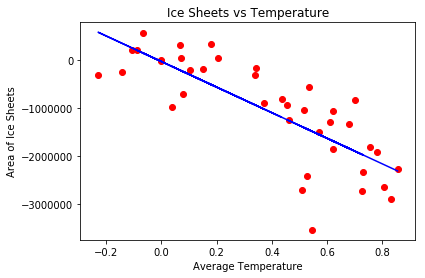

In [9]:
plt.scatter(x, y, color= 'red')
plt.plot(x, regressor.predict(x), color = 'blue', label = '')
plt.title ("Ice Sheets vs Temperature")
plt.xlabel("Average Temperature")
plt.ylabel("Area of Ice Sheets")
plt.show()

In [10]:
scipy.stats.linregress(df_temp["change"],df_ice["change"])

LinregressResult(slope=-2661822.909846024, intercept=-38291.9292011722, rvalue=-0.7926009207485143, pvalue=1.8190906299864145e-09, stderr=336642.5002614212)

In [11]:
df_ice = pd.read_csv("./icesheets.csv")
theta_0 =  -1000000
theta_cap = df_ice.change.mean()
se = df_ice.change.std()
n = 6.2449979984 #sqrt(39)
se = se/n
se_cap = se
w = (theta_cap - theta_0)/se
print("theta_cap : ",theta_cap)
print("theta_0 : ",theta_0)
print("walds-statistic : ",w)
print("95%% confidence interval %f to %f"%(theta_cap-1.96*se_cap,theta_cap+1.96*se_cap))

theta_cap :  -1033562.0320512813
theta_0 :  -1000000
walds-statistic :  -0.1954835776327572
95% confidence interval -1370068.983771 to -697055.080331


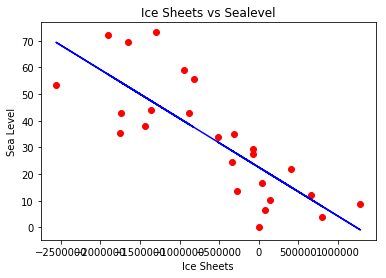

LinregressResult(slope=-1.832087096293542e-05, intercept=22.57569604151481, rvalue=-0.8011402418310739, pvalue=1.4979318571289863e-06, stderr=2.8537824901144324e-06)

In [12]:

df_ice = pd.read_csv("./icesheets.csv")

val1993 = df_ice[(df_ice["Year"]==1993)]["IceArea"].values[0]

df_ice["change1993"] = df_ice["IceArea"] - val1993

df_ice.to_csv("./icesheets.csv")

df_sea = pd.read_csv("./sealevelrise.csv")

df_sea['gmsl_change'].corr(df_sea['ice_change'])

sea_level = []

sea_level = df_sea["gmsl_change"].tolist()

ice_level = []

ice_level = df_sea["ice_change"].tolist()

x = np.array(ice_level).reshape(-1, 1)
y = np.array(sea_level)

from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(x, y)

plt.scatter(x, y, color= 'red')
plt.plot(x, regressor.predict(x), color = 'blue', label = '')
plt.title ("Ice Sheets vs Sealevel")
plt.xlabel("Ice Sheets")
plt.ylabel("Sea Level")
plt.show()

scipy.stats.linregress(df_sea["ice_change"],df_sea["gmsl_change"])